In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
def show_comparison2D(estimated, true_frequency):
    counts = np.empty((11,11))
    for i in range(11):
        for j in range(11):
            counts[i,j] = np.sum(np.logical_and(estimated[:,0]==i, estimated[:,1]==j))
            
    plt.imshow(counts, cmap = 'gray')
    plt.title('Estimated Frequency')
    plt.show()
    plt.imshow(true_frequency, cmap = 'gray')
    plt.title('True Frequency')
    plt.show()

question 1

Utility functions for question 1

In [43]:
def g(A, i):
    return A**i/np.math.factorial(i)

def poisson():
    n = 10
    A = 8
    d = np.empty(n+1)
    for j in range(n+1):
        d[j] = g(A,j)
    return d/np.sum(d)

The algorithm

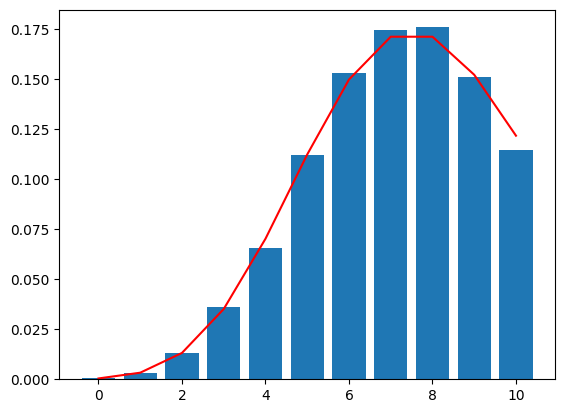

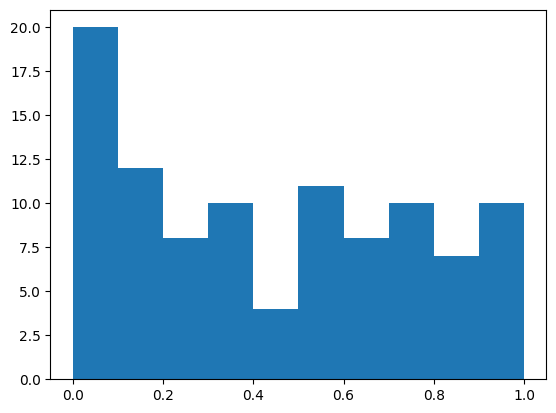

In [44]:
def metropolis_hastings(init = 0, size = 10000):
    A = 8
    m = 10
    res = [init]
    n = 1
    x = init
    while n < size:
        delta = np.random.randint(-m,m+1)
        y = np.mod(x + delta, m+1)
        gy = g(A, y)
        gx = g(A, x)
        if gy >= gx:
            res.append(y)
            x = y
        else:
            p = np.random.rand(1)
            if (p < gy/gx):
                res.append(y)
                x = y
            else:
                res.append(x)
        n += 1
    return res

vals = metropolis_hastings()
unique = np.unique(vals)
counts = np.empty(11)
for i,u in enumerate(unique):
    counts[i] = np.sum(vals == u)

plt.bar(range(11), counts/len(vals))
plt.plot(poisson(), color = 'Red')
plt.show()


p = []
for i in range(100):
    vals = metropolis_hastings()[::4] # the values are dependent with each other
    unique = np.unique(vals)
    counts = np.empty(11)
    for i,u in enumerate(unique):
        counts[i] = np.sum(vals == u)
    p.append(stats.chisquare(counts, poisson()*len(vals))[1])

plt.hist(p)
plt.show()


Question 2 - metropolis hastings

In [45]:
possible = []
for i in range(11):
    for j in range(11 - i):
        possible.append([i, j])

def getNewIJ():
    idx = int(np.floor(np.random.uniform(0,1)*66))
    return possible[idx]

In [7]:
def g_2D(A1, A2, i, j):
    return A1**i/np.math.factorial(i)*A2**j/np.math.factorial(j)

def poisson2D():
    res = np.zeros((11,11))
    for i in range(11):
        for j in range(0, 11 - i):
            res[i,j] = g_2D(4,4,i,j)
    return res/np.sum(res)

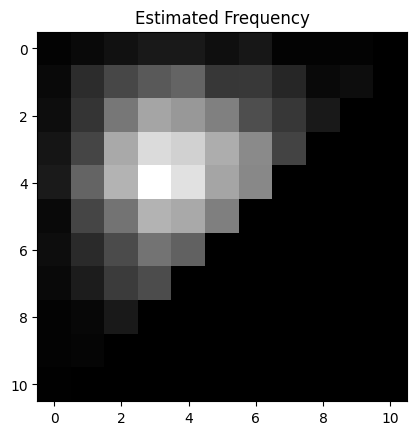

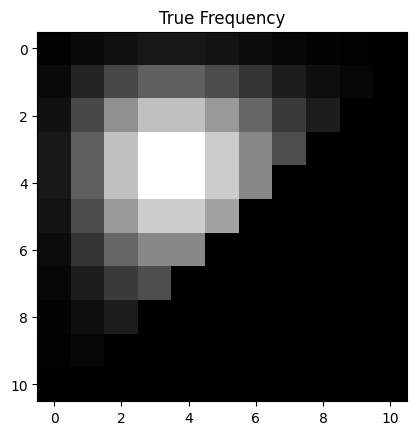

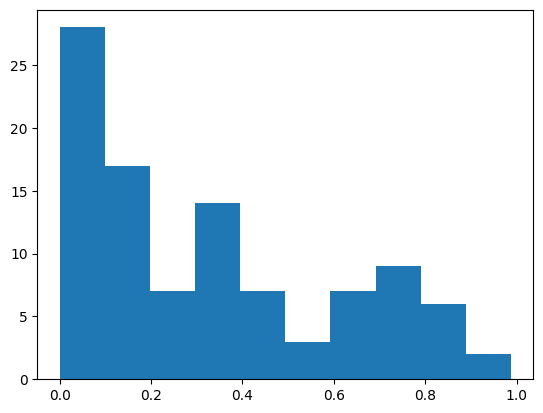

In [47]:
def metropolis_hastings2D(init = [0,0], size = 10000):
    A1 = 4
    A2 = 4
    m = 10

    res = np.empty((size,2))
    n = 1
    res[0,:] = init
    i = init[0]
    j = init[1]

    while n < size:
        
        new_i, new_j = getNewIJ()

        gy = g_2D(A1, A2, new_i, new_j)
        gx = g_2D(A1, A2, i, j)
        if gy >= gx:
            res[n,:] = [new_i, new_j]
            i = new_i
            j = new_j
        else:
            p = np.random.rand(1)
            if (p <= gy/gx):
                res[n,:] = [new_i, new_j]
                i = new_i
                j = new_j
            else:
                res[n,:] = [i,j]
        n += 1
    return res

vals = metropolis_hastings2D()[::4]

show_comparison2D(vals, poisson2D()*vals.shape[0])


true_f = poisson2D()*vals.shape[0]

mask = true_f !=0
p = []
for i in range(100):
    vals = metropolis_hastings2D()[::4] # the values are dependent with each other
    counts = np.empty((11,11))
    for i in range(11):
        for j in range(11):
            counts[i,j] = np.sum(np.logical_and(vals[:,0]==i, vals[:,1]==j))
    true_f = poisson2D()*vals.shape[0]
    p.append(stats.chisquare(counts[mask].flatten(), true_f[mask].flatten())[1])

plt.hist(p)
plt.show()

question 2b

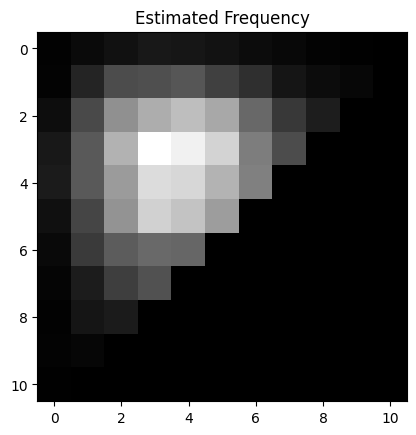

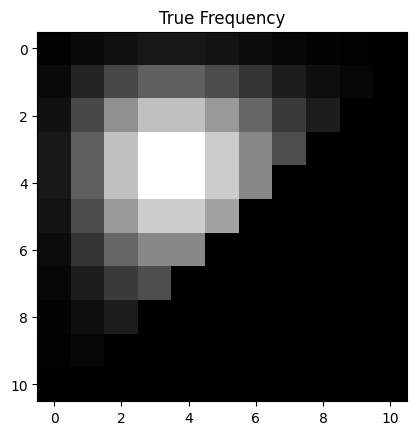

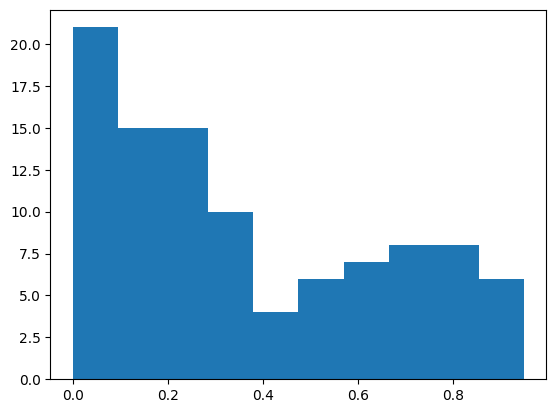

In [48]:
def metropolis_hastings2D_coord(init = [0,0], size = 10000):
    A1 = 4
    A2 = 4
    m = 10

    res = np.empty((size,2))
    n = 1
    res[0,:] = init
    i = init[0]
    j = init[1]

    direction = True
    while n < size:
        if direction == True:
            new_i = np.random.randint(0, m - j + 1)
            new_j = j
        else:
            new_i = i
            new_j = np.random.randint(0, m - i + 1)
        gy = g_2D(A1, A2, new_i, new_j)
        gx = g_2D(A1, A2, i, j)
        if gy >= gx:
            res[n,:] = [new_i, new_j]
            i = new_i
            j = new_j
        else:
            p = np.random.rand(1)
            if (p < gy/gx):
                res[n,:] = [new_i, new_j]
                i = new_i
                j = new_j
            else:
                res[n,:] = [i,j]
        n += 1
        direction = not direction
    return res

vals = metropolis_hastings2D_coord()

show_comparison2D(vals, poisson2D()*vals.shape[0])

true_f = poisson2D()*vals.shape[0]
mask = true_f !=0

p = []
for i in range(100):
    vals = metropolis_hastings2D_coord()[::4] # the values are dependent with each other
    counts = np.empty((11,11))
    for i in range(11):
        for j in range(11):
            counts[i,j] = np.sum(np.logical_and(vals[:,0]==i, vals[:,1]==j))
    true_f = poisson2D()*vals.shape[0]
    p.append(stats.chisquare(counts[mask].flatten(), true_f[mask].flatten())[1])

plt.hist(p)
plt.show()


question 2c - gibbs

the following function outputs a vector of probabilities. This probability masses represents the conditional probability of i given j. Since the problem is symmetric the probability distribution of j given i is the same

In [5]:
#exploits symmetries in the distribution
def condProb(j):
    probs = poisson2D()
    s = np.sum(probs[j,:])
    p = np.zeros(11)
    for k in range(len(p)):
        p[k] = probs[j,k]/s
    return p


The algorithm

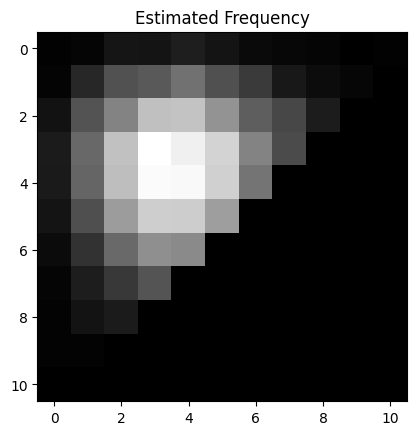

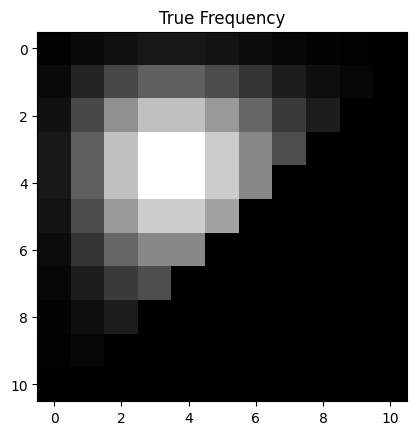

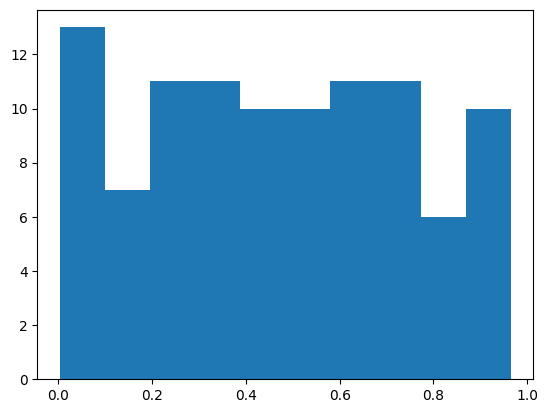

In [8]:
def metropolis_hastings2D_gibbs(init = [0,0], size = 10000):
    A1 = 4
    A2 = 4
    m = 10

    res = np.empty((size,2))
    n = 1
    res[0,:] = init
    i = init[0]
    j = init[1]
    while n < size:
        p = condProb(j)
        new_i = np.random.choice(np.arange(11), p = p)
        p = condProb(int(new_i))
        new_j = np.random.choice(np.arange(11), p = p)

        res[n, :] = [new_i, new_j]
        i = new_i
        j = new_j

        n += 1
    return res

vals = metropolis_hastings2D_gibbs()

show_comparison2D(vals, poisson2D()*vals.shape[0])

true_f = poisson2D()*vals.shape[0]
mask = true_f!=0

p = []
for i in range(100):
    vals = metropolis_hastings2D_gibbs()[::4] # the values are dependent with each other
    counts = np.empty((11,11))
    for i in range(11):
        for j in range(11):
            counts[i,j] = np.sum(np.logical_and(vals[:,0]==i, vals[:,1]==j))
    true_f = poisson2D()*vals.shape[0]
    p.append(stats.chisquare(counts[mask].flatten(), true_f[mask].flatten())[1])

plt.hist(p)
plt.show()

question 3a

In [ ]:
sampled = np.random.multivariate_normal([0,0], cov = [[1,1/2],[1/2,1]])
np.exp(sampled)

array([8.91866579, 3.31331256])

question 3b

[0.12318263417991321,
 15.630232572122564,
 0.4639527774440366,
 1.6955488375514651,
 -1.8303577166592735,
 1.1639395947530422,
 2.8788892113738944,
 0.18232304809520855,
 1.5554335883668222,
 22.952436932324453]

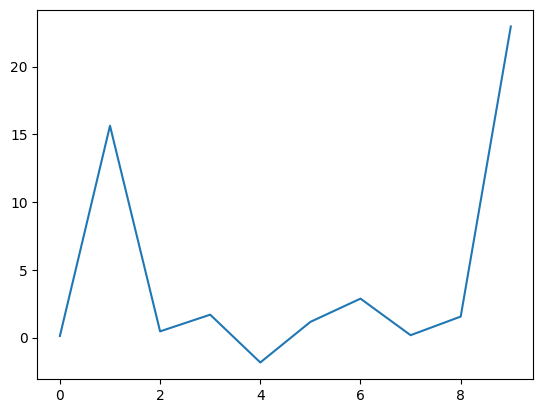

In [ ]:
xlist = []
for i in range(10):
    sampled = np.random.multivariate_normal([0,0], cov = [[1,1/2],[1/2,1]])
    exp = np.exp(sampled)
    mu = exp[0]
    s = exp[1]
    xlist.append(stats.norm.rvs(loc = mu, scale = s))

plt.plot(xlist)
xlist

question 3c